# Python Scaffolded Activity

## Model Setup

In [1]:
%%capture
!pip install ipympl
%matplotlib widget
import numpy as np
import math as m
import matplotlib.pyplot as plt
from google.colab import output
output.enable_custom_widget_manager()

In [8]:
def plot(data):
    plt.close()
    # Unpack data
    counter,x,y,R = data
    # Plot the model
    fig,ax = plt.subplots(1,1,figsize=(8,8))
    ax.set_title('Step Count:' + str(counter))
    ax.set_xlim(-R,R)
    ax.set_ylim(-R,R)
    ax.plot(x,y)
    # ax.plot([0,x[-1]],[0,y[-1]])
    ax.add_patch(plt.Circle((0,0),R,fill=False,color='dodgerblue',linewidth=2))

In [9]:
def model(radius,step_length=None,opacity=None,density=None):
    X = 0
    Y = 0
    X_list = []
    Y_list = []
    counter = 0
    # Check to see if no extra inputs are given
    if opacity == None and density == None and step_length == None:
        step_length = 1
    # If only a step length is specified, do nothing
    elif opacity == None and density == None and (type(step_length) == int or type(step_length) == float):
        pass
    # If a density and opacity are specified with no step length, calculate step length
    elif step_length == None and (type(opacity) == int or type(opacity) == float) and (type(density) == int or type(density) == float):
        step_length = 1 / (density * opacity)
    # If neither combination of inputs work, print an error message and return
    else:
        print('Invalid model input: Please specify either a step length, or a density and opacity.')
        return
    
    step_length = 1 # 1 / (opacity * density)
    while m.sqrt(X**2 + Y**2) < radius:
        angle = 2 * np.pi * np.random.random()
        X_list.append(X)
        Y_list.append(Y)
        X = X + step_length * m.cos(angle)
        Y = Y + step_length * m.sin(angle)
        counter += 1
    return(counter,X_list,Y_list,radius)

## Running The Model

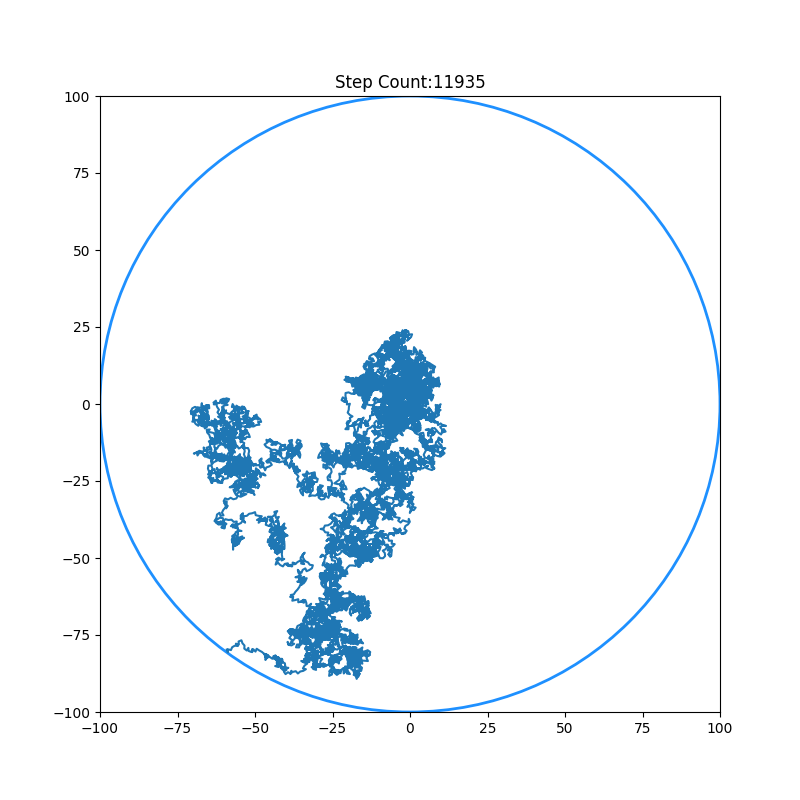

In [10]:
data = model(radius=100,step_length=1)
plot(data)